In [1]:
import pennylane as qml
import pennylane.numpy as np
import networkx as nx
from pennylane import qaoa
from matplotlib import pyplot as plt

# Exemple pour Max-cut

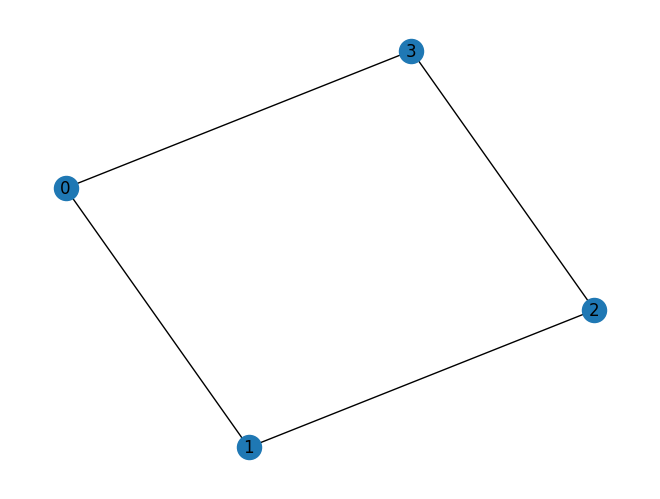

In [2]:
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
G = nx.Graph(edges)

nx.draw(G, with_labels=True)

In [3]:
A = 0.5
B = 1/2

cost_h = qml.Hamiltonian(
    [-A for e in G.nodes],
    [qml.Identity(e) for e in G.nodes],
) + qml.Hamiltonian(
    [B for e in G.edges],
    [qml.PauliZ(e[0]) @ qml.PauliZ(e[1]) for e in G.edges],
)


mixer_h = qaoa.x_mixer(G)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-2.0) [I0]
+ (0.5) [Z0 Z1]
+ (0.5) [Z0 Z3]
+ (0.5) [Z1 Z2]
+ (0.5) [Z2 Z3]
Mixer Hamiltonian   (1) [X0]
+ (1) [X1]
+ (1) [X2]
+ (1) [X3]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

wires = range(4)
depth = 2
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)


def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [5]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

Optimal Parameters
[[ 0.92993546 -0.42092875]
 [ 0.5056813   0.63471309]]


/var/folders/8b/h0lmfwfd51b4yb339mspmpvc0000gn/T/ipykernel_97983/847613202.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


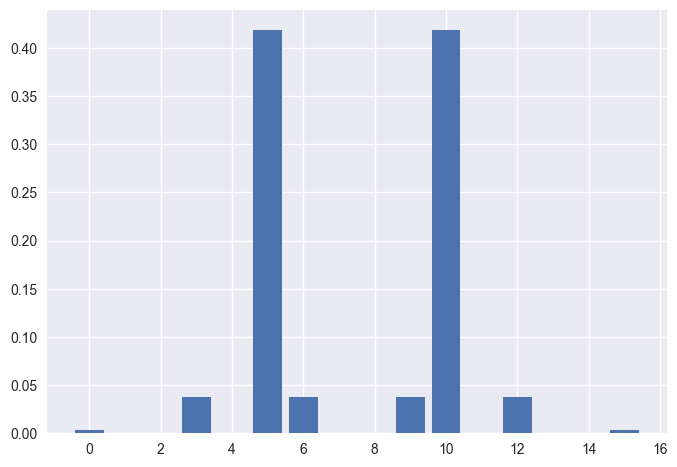

In [6]:
plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()

# Exemple Vertex Cover

In [ ]:
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
G = nx.Graph(edges)

nx.draw(G, with_labels=True)

## Votre Code ICI

In [ ]:
# Votre code doit être ici

A = 
B = -

cost_h = 

# Jusqu'ici
### NE PAS MODIFIER LE CODE SUIVANT ####

mixer_h = qaoa.x_mixer(G)


print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

In [ ]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

wires = range(4)
depth = 2
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)


def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [ ]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

In [ ]:
plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()